In [ ]:
import numpy as np
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
df=pd.read_csv('/content/SMSSpamCollection.csv',encoding='latin-1',header=None)

In [ ]:

df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns={0:'label',1:'message'},inplace=True)

In [ ]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print("no. of rows",len(df))

no. of rows 5572


In [ ]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
from wordcloud import WordCloud

In [ ]:
plt.figure(figsize=(30,30))
wc=WordCloud(width=2000,height=1000,background_color="black")

<Figure size 3000x3000 with 0 Axes>

In [ ]:
spam_wc=wc.generate(df[df['label']=='spam']['message'].str.cat(sep=" "))
spam_wc

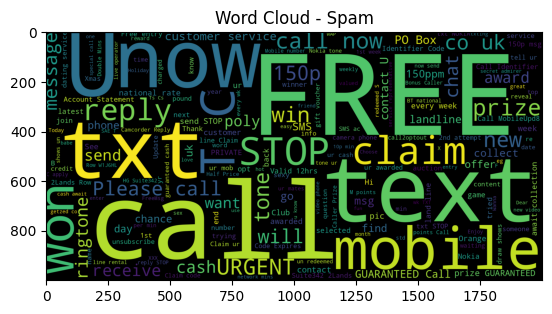

In [ ]:

plt.title('Word Cloud - Spam')

plt.imshow(spam_wc)

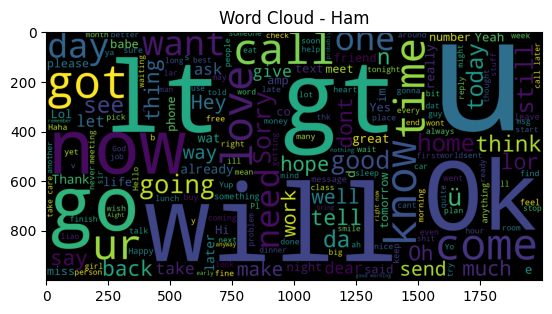

In [ ]:
ham_wc=wc.generate(df[df['label']=='ham']['message'].str.cat(sep=" "))
ham_wc
plt.title('Word Cloud - Ham')
plt.imshow(ham_wc)


LABEL ENCODING

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

array([0, 1])

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA

In [ ]:
df.isna().any()

label      False
message    False
dtype: bool

In [ ]:
df.isna().sum()

label      0
message    0
dtype: int64

In [ ]:
df.nunique() #checking for total number of non-duplicate records

label         2
message    5169
dtype: int64

In [ ]:
df['message'].value_counts()

Sorry, I'll call later                                                                                                                                         30
I cant pick the phone right now. Pls send a message                                                                                                            12
Ok...                                                                                                                                                          10
Okie                                                                                                                                                            4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                        4
                                                                                                                                                               ..
No. On the way home. So if n

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
len(df['message'])

5169

In [ ]:
df['message'].nunique()

5169

In [ ]:
len(df['message'])

5169

In [ ]:
df.shape

(5169, 2)

CLASS DISTRIBUTION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

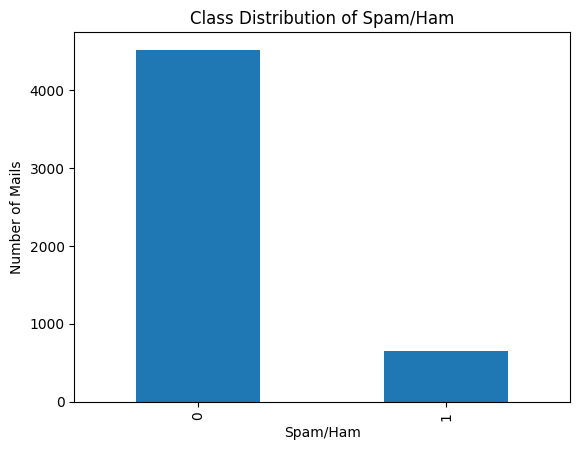

In [ ]:
class_counts = df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [ ]:
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data=df
data["No_of_Characters"] = data["message"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,5169.0,0.126330,0.332253,0.0,0.0,0.0,0.0,1.0
No_of_Characters,5169.0,79.344554,58.437457,2.0,36.0,61.0,119.0,910.0
No_of_Words,5169.0,18.592958,13.413910,1.0,9.0,15.0,26.0,220.0
No_of_sentence,5169.0,1.974657,1.460104,1.0,1.0,1.0,2.0,38.0


<Figure size 1200x800 with 0 Axes>

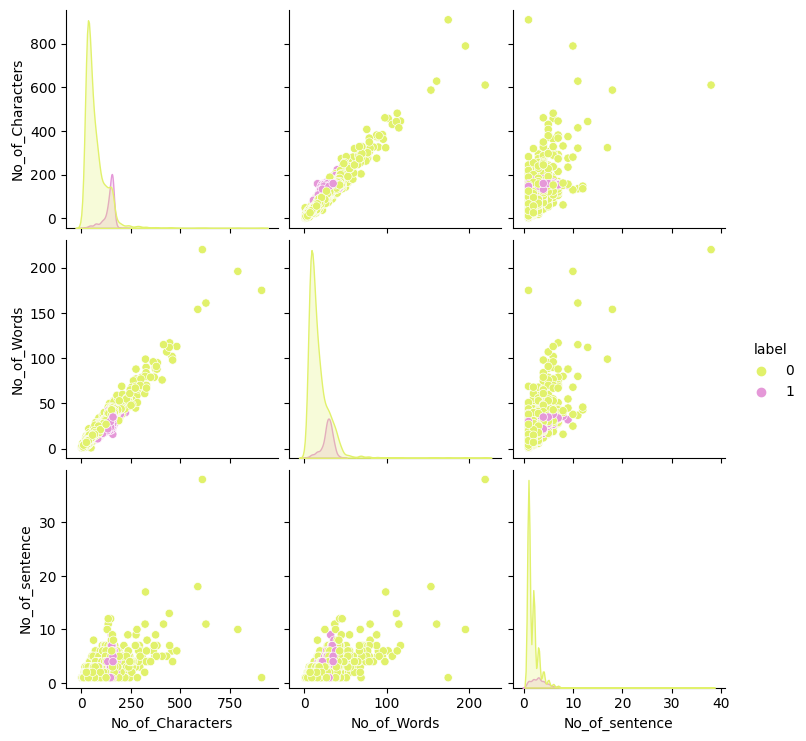

In [ ]:
cols= ["#E1F16B", "#E598D8"]
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="label",palette=cols)
plt.show(fg)

<Figure size 1200x800 with 0 Axes>

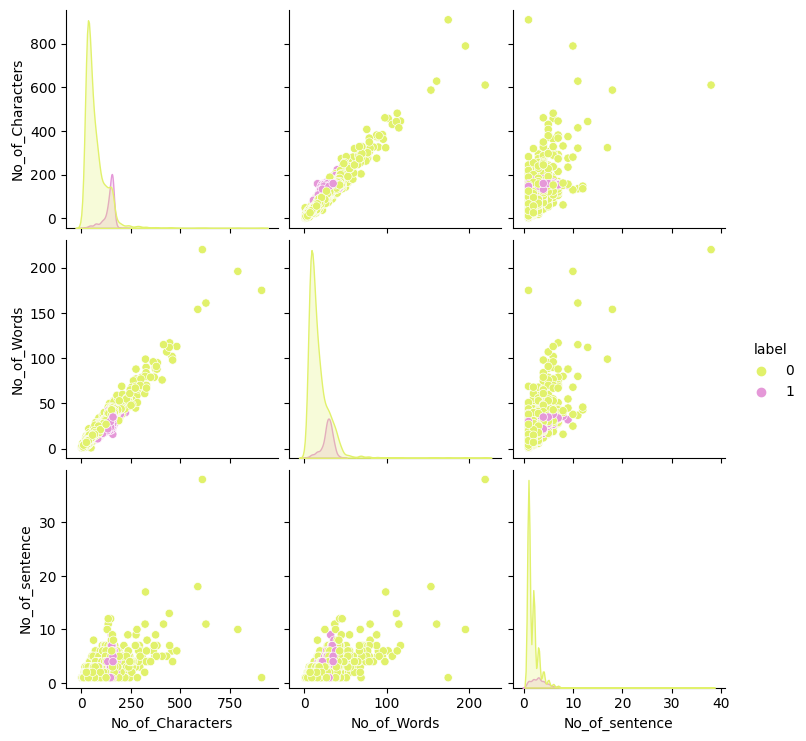

In [ ]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="label",palette=cols)
plt.show(fg)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
all_text = ' '.join(df['message'].values)
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
words = all_text.split()
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1378),
 ('u', 620),
 ('2', 427),
 ('get', 313),
 ('call', 310),
 ('U', 277),
 ("I'm", 277),
 ('ur', 255),
 ('&lt;', 254),
 ('You', 243),
 ('4', 232),
 ('go', 229),
 ('like', 214),
 ('know', 206),
 ('got', 198),
 ('?', 186),
 ('come', 183),
 ('.', 171),
 ('...', 160),
 ('want', 154),
 ('time', 146),
 ('need', 141),
 ('going', 138),
 ('How', 135),
 ('Call', 134),
 ('send', 133),
 ('still', 130),
 ('one', 128),
 ('n', 120),
 ('But', 120),
 ('text', 118),
 ('No', 113),
 ('think', 111),
 ('If', 111),
 ('love', 111),
 ('Just', 109),
 ('see', 109),
 ('So', 108),
 ("I'll", 107),
 ('We', 107),
 ('good', 107),
 ('back', 106),
 ('ü', 105),
 ('Do', 104),
 ('r', 104),
 ('home', 102),
 ('&', 102),
 ('take', 96),
 ('tell', 96),
 ('What', 95),
 ('free', 94),
 ('And', 94),
 ('day', 93),
 ('dont', 92),
 ('Your', 92),
 ("i'm", 89),
 ('Ok', 87),
 ('me.', 87),
 ('A', 87),
 ('make', 87),
 ('give', 86),
 ('The', 85),
 ('new', 84),
 ('mobile', 83),
 ('you.', 82),
 ('ask', 81),
 ('much', 80),
 ('Hey', 7

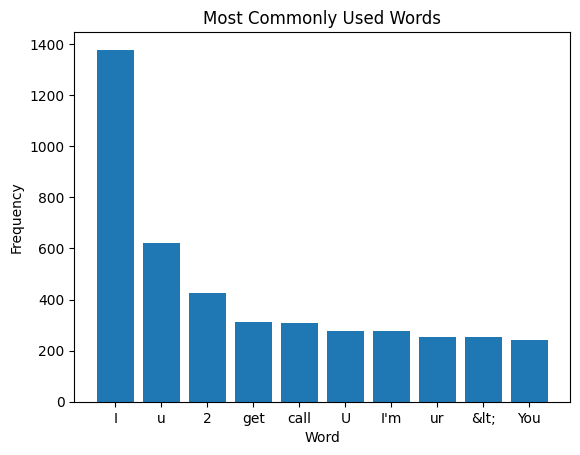

In [ ]:
top_words = word_counts.most_common(10)
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [ ]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.auto import tqdm
import time
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [ ]:
tqdm.pandas()

df['cleaned_text'] = df['message'].progress_apply(clean_text)

  0%|          | 0/5169 [00:00<?, ?it/s]

In [ ]:
df

,label,message,No_of_Characters,No_of_Words,No_of_sentence,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,nd time tri contact u u pound prize claim easi...
5568,0,Will ü b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [ ]:
cleaned_words=[]

In [ ]:
for i in range(len(df)):
    f=[]
    t=(df.iloc[i])["cleaned_text"].split()
    f=[j for j in t if j not in cleaned_words]
    cleaned_words=cleaned_words+f

In [ ]:
len(cleaned_words)

6529

In [ ]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['label']

In [ ]:
df['cleaned_text'][5570]

'guy bitch act like interest buy someth els next week gave us free'

In [ ]:
cv.vocabulary_

{'go': 1942,
 'point': 2818,
 'crazi': 958,
 'avail': 379,
 'bugi': 629,
 'great': 1973,
 'world': 4841,
 'la': 2271,
 'buffet': 628,
 'cine': 801,
 'got': 1961,
 'amor': 190,
 'wat': 4663,
 'ok': 2680,
 'lar': 2283,
 'joke': 2222,
 'wif': 4762,
 'oni': 2689,
 'free': 1796,
 'entri': 1462,
 'wkli': 4807,
 'comp': 847,
 'win': 4773,
 'fa': 1580,
 'cup': 1009,
 'final': 1679,
 'tkt': 4244,
 'st': 3811,
 'may': 2449,
 'text': 4128,
 'receiv': 3110,
 'question': 3027,
 'std': 3839,
 'txt': 4403,
 'rate': 3072,
 'appli': 262,
 'dun': 1340,
 'say': 3359,
 'earli': 1357,
 'hor': 2074,
 'alreadi': 163,
 'nah': 2587,
 'think': 4176,
 'goe': 1945,
 'usf': 4518,
 'live': 2342,
 'around': 302,
 'though': 4193,
 'freemsg': 1802,
 'hey': 2043,
 'darl': 1056,
 'week': 4698,
 'word': 4835,
 'back': 414,
 'like': 2328,
 'fun': 1848,
 'still': 3860,
 'tb': 4075,
 'xxx': 4908,
 'chg': 778,
 'send': 3429,
 'rcv': 3083,
 'even': 1511,
 'brother': 614,
 'speak': 3745,
 'treat': 4346,
 'aid': 118,
 'per': 27

In [ ]:
max((cv.vocabulary_).values())

4999

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = StratifiedKFold(n_splits=5, random_state=16,shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
print('accuracy' % mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


accuracy


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.7s finished


In [ ]:
mean(scores)

0.8541265885357665

In [ ]:
len(X)

5169

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [ ]:
len(y[y==1]) #SPAM

653

In [ ]:
len(y[y==0]) #HAM

4516

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.8)
# define pipeline
steps = [('over', over),('under',under), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = StratifiedKFold(n_splits=5, random_state=16,shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1,error_score='raise')
print('accuracy', mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


accuracy 0.8446475215378019


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.9s finished


In [ ]:
mean(scores)

0.8446475215378019

Word 2 vec

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

In [ ]:
df["tokens"]=df["cleaned_text"].apply(lambda x: x.split())

In [ ]:
df

,label,message,No_of_Characters,No_of_Words,No_of_sentence,cleaned_text,tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"[nah, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,nd time tri contact u u pound prize claim easi...,"[nd, time, tri, contact, u, u, pound, prize, c..."
5568,0,Will ü b going to esplanade fr home?,36,9,1,b go esplanad fr home,"[b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,"[piti, mood, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,"[guy, bitch, act, like, interest, buy, someth,..."


In [ ]:
texts = df.tokens.tolist()


In [ ]:
texts

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni'],
 ['free',
  'entri',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  'st',
  'may',
  'text',
  'fa',
  'receiv',
  'entri',
  'question',
  'std',
  'txt',
  'rate',
  'c',
  'appli'],
 ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'],
 ['nah', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  'copi',
  'friend',
  'callertun'],
 ['winner',
  'valu',
  'network',
  'custom',
  'select'

In [ ]:
model = Word2Vec(sentences=texts,vector_size = 100, window = 5)


In [ ]:
model.wv["talk"]

array([-0.11192238,  0.2785939 ,  0.03508407,  0.00094644, -0.00902089,
       -0.48582247,  0.12787786,  0.5508333 , -0.19384943, -0.08677802,
       -0.21206433, -0.35390824, -0.12654941,  0.08836105,  0.15338096,
       -0.08855685,  0.02534668, -0.29238737, -0.00917053, -0.47466245,
        0.11830766,  0.2789377 ,  0.10247561, -0.11367273, -0.16492179,
        0.11522005, -0.17558761, -0.19918914, -0.26816323,  0.10851827,
        0.25366822,  0.02802276,  0.11986805, -0.14064647, -0.10653624,
        0.38617674,  0.07722583, -0.20155938, -0.2020097 , -0.49203333,
        0.05765025, -0.26238903, -0.1230478 , -0.05453682,  0.17507659,
       -0.15472904, -0.13005115, -0.03339472,  0.12559703,  0.07396295,
        0.15487467, -0.26740858, -0.10013342, -0.00738723, -0.148076  ,
        0.17736499,  0.1650969 , -0.11705685, -0.27173248,  0.20066758,
        0.04921755,  0.03297848, -0.00997514, -0.09850796, -0.27912614,
        0.27878922,  0.21236977,  0.18503949, -0.3183082 ,  0.29

In [ ]:
embeddings=[]

In [ ]:
for record in df['tokens']:
    record_embedding = np.zeros(model.vector_size)
    count = 0
    for word in record:
        if word in model.wv:
            record_embedding += model.wv[word]
            count += 1
    if count != 0:
        record_embedding /= count
    embeddings.append(record_embedding)

In [ ]:
df["embeddings"]=embeddings

In [ ]:
df

,label,message,No_of_Characters,No_of_Words,No_of_sentence,cleaned_text,tokens,embeddings
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,"[go, jurong, point, crazi, avail, bugi, n, gre...","[-0.11684698668810037, 0.2906857178761409, 0.0..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,"[ok, lar, joke, wif, u, oni]","[-0.11181453689932823, 0.28198184370994567, 0...."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...,"[free, entri, wkli, comp, win, fa, cup, final,...","[-0.10648561786446306, 0.2599981687963009, 0.0..."
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,"[u, dun, say, earli, hor, u, c, alreadi, say]","[-0.15060357004404068, 0.3922720067203045, 0.0..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,"[nah, think, goe, usf, live, around, though]","[-0.10117649393422264, 0.24270301525081908, 0...."
...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,nd time tri contact u u pound prize claim easi...,"[nd, time, tri, contact, u, u, pound, prize, c...","[-0.1404060123159605, 0.32989898499320536, 0.0..."
5568,0,Will ü b going to esplanade fr home?,36,9,1,b go esplanad fr home,"[b, go, esplanad, fr, home]","[-0.15161163080483675, 0.3662515003234148, 0.0..."
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest,"[piti, mood, suggest]","[-0.021662995219230652, 0.05815397948026657, -..."
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...,"[guy, bitch, act, like, interest, buy, someth,...","[-0.11384478655572121, 0.27467932638067466, 0...."


In [ ]:
X=np.stack(df["embeddings"].to_numpy())
Y=df["label"].to_numpy()

In [ ]:
X

array([[-0.11684699,  0.29068572,  0.0244943 , ..., -0.24494397,
         0.12223191,  0.01378619],
       [-0.11181454,  0.28198184,  0.02823628, ..., -0.23321137,
         0.1168179 ,  0.01496205],
       [-0.10648562,  0.25999817,  0.02466314, ..., -0.21579502,
         0.1082156 ,  0.00941294],
       ...,
       [-0.021663  ,  0.05815398, -0.00063096, ..., -0.04226346,
         0.02226071,  0.00059696],
       [-0.11384479,  0.27467933,  0.02715984, ..., -0.22607239,
         0.11539633,  0.0123894 ],
       [-0.10000378,  0.22978083,  0.02169423, ..., -0.20320292,
         0.09509725,  0.01233788]])

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = StratifiedKFold(n_splits=5, random_state=16,shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
pscores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1, verbose=1)
rscores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1, verbose=1)
fscores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1, verbose=1)
print('accuracy' % mean(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


accuracy


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


In [ ]:
dtc_mean=mean(scores)
dtc_pmean=mean(pscores)
dtc_rmean=mean(rscores)
dtc_fscore=mean(fscores)
print(dtc_mean)
print(dtc_pmean)
print(dtc_rmean)
print(dtc_fscore)

0.9278372695253913
0.6706479518303644
0.8070111567821492
0.728937977926966


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
steps = [('over', over),('under',under), ('model',KNeighborsClassifier(4))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = StratifiedKFold(n_splits=5, random_state=16,shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1,error_score='raise')
pscores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1, verbose=1)
rscores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1, verbose=1)
fscores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [ ]:
knn_mean=mean(scores)
knn_pmean=mean(pscores)
knn_rmean=mean(rscores)
knn_fscore=mean(fscores)
print(knn_mean)
print(knn_pmean)
print(knn_rmean)
print(knn_fscore)

0.9201001383737063
0.6313965288534218
0.90349970640047
0.7346461424124981


In [ ]:
 from sklearn.svm import SVC

In [ ]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
# define pipeline
steps = [('over', over),('under',under), ('model',SVC())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = StratifiedKFold(n_splits=5, random_state=16,shuffle=True)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1,error_score='raise')
pscores = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1, verbose=1)
rscores = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1, verbose=1)
fscores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


In [ ]:
svc_mean=mean(scores)
svc_pmean=mean(pscores)
svc_rmean=mean(rscores)
svc_fscore=mean(fscores)
print(svc_mean)
print(svc_pmean)
print(svc_rmean)
print(svc_fscore)

0.9276449693948818
0.9059971382516551
0.48542571931884915
0.6324273105890842


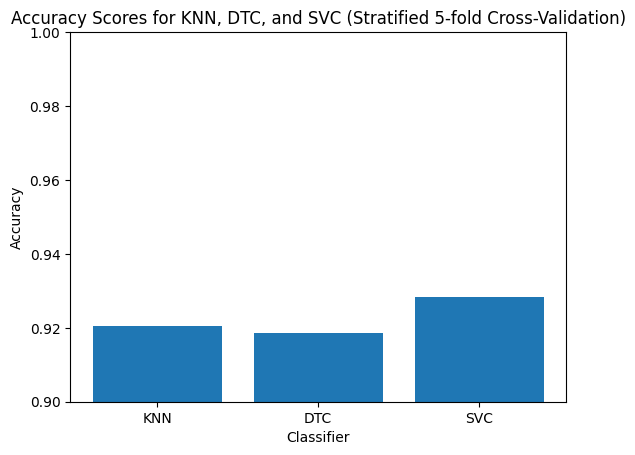

In [ ]:
fig, ax = plt.subplots()
ax.bar(['KNN', 'DTC', 'SVC'], [knn_mean, dtc_mean, svc_mean])
ax.set_title(f'Accuracy Scores for KNN, DTC, and SVC (Stratified 5-fold Cross-Validation)')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.9, 1])
plt.show()

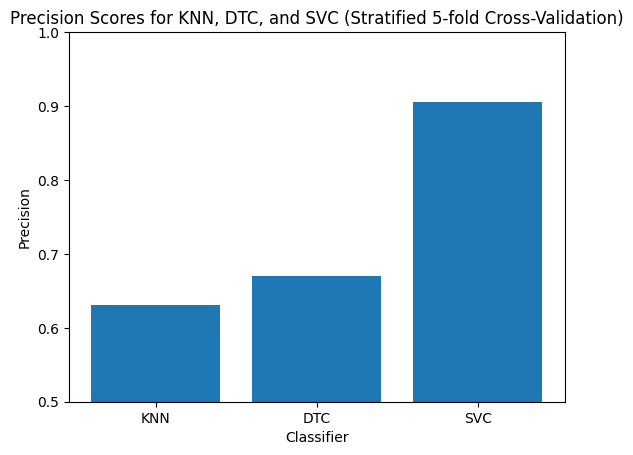

In [ ]:
fig, ax = plt.subplots()
ax.bar(['KNN', 'DTC', 'SVC'], [knn_pmean, dtc_pmean, svc_pmean])
ax.set_title(f'Precision Scores for KNN, DTC, and SVC (Stratified 5-fold Cross-Validation)')
ax.set_xlabel('Classifier')
ax.set_ylabel('Precision')
ax.set_ylim([0.5, 1])
plt.show()

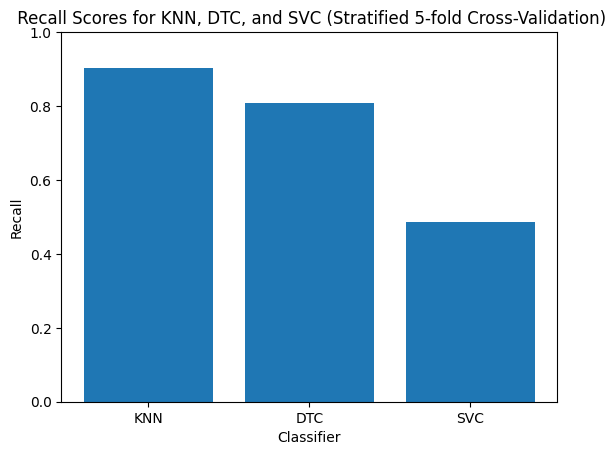

In [ ]:
fig, ax = plt.subplots()
ax.bar(['KNN', 'DTC', 'SVC'], [knn_rmean, dtc_rmean, svc_rmean])
ax.set_title(f' Recall Scores for KNN, DTC, and SVC (Stratified 5-fold Cross-Validation)')
ax.set_xlabel('Classifier')
ax.set_ylabel('Recall')
ax.set_ylim([0, 1])
plt.show()

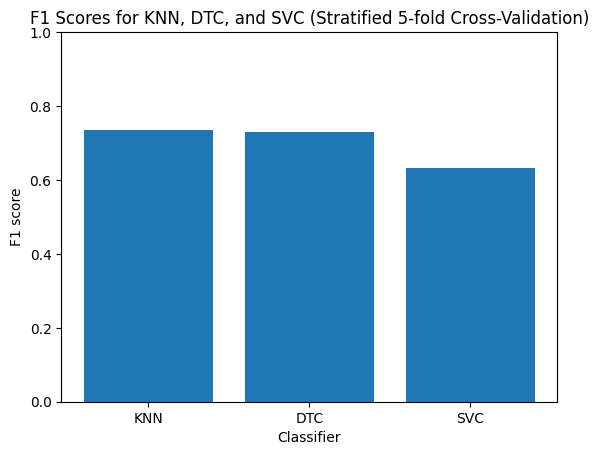

In [ ]:
fig, ax = plt.subplots()
ax.bar(['KNN', 'DTC', 'SVC'], [knn_fscore, dtc_fscore, svc_fscore])
ax.set_title(f'F1 Scores for KNN, DTC, and SVC (Stratified 5-fold Cross-Validation)')
ax.set_xlabel('Classifier')
ax.set_ylabel('F1 score')
ax.set_ylim([0, 1])
plt.show()